In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
dataset_path = r'C:\Users\vides\Downloads\2750'

In [5]:
categories = os.listdir(dataset_path)
print("Categories:", categories)

Categories: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 64  

X = []
y = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    class_label = categories.index(category)

    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)

        img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))

        img_array = img_to_array(img) / 255.0

        X.append(img_array)
        y.append(class_label)

X = np.array(X)
y = np.array(y)

print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)

print("Unique labels:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(categories))

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Shape of X (images): (27000, 64, 64, 3)
Shape of y (labels): (27000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Training set size: 21600
Test set size: 5400


In [10]:
# Build the CNN model
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    # Convolutional layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten layer
    tf.keras.layers.Flatten(),
    
    # Fully connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Output layer (softmax for multi-class classification)
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


C:\Users\vides\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,293,194 (16.38 MB)

 Trainable params: 4,293,194 (16.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 93s 128ms/step - accuracy: 0.4466 - loss: 1.4551 - val_accuracy: 0.7300 - val_loss: 0.7236
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 83s 122ms/step - accuracy: 0.7411 - loss: 0.7126 - val_accuracy: 0.7867 - val_loss: 0.5879
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 145s 126ms/step - accuracy: 0.8054 - loss: 0.5342 - val_accuracy: 0.7256 - val_loss: 0.7446
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 84s 124ms/step - accuracy: 0.8496 - loss: 0.4354 - val_accuracy: 0.8444 - val_loss: 0.4509
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 83s 124ms/step - accuracy: 0.8712 - loss: 0.3652 - val_accuracy: 0.8524 - val_loss: 0.4127
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 87s 128ms/step - accuracy: 0.8987 - loss: 0.2838 - val_accuracy: 0.8156 - val_loss: 0.5542
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.9273 - loss: 0.2040 - val_accuracy: 0.8496 - val_loss: 0.4575
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 89s 132ms/step - accuracy: 0.9439 - loss: 

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.8373 - loss: 0.6219
Test accuracy: 84.61%


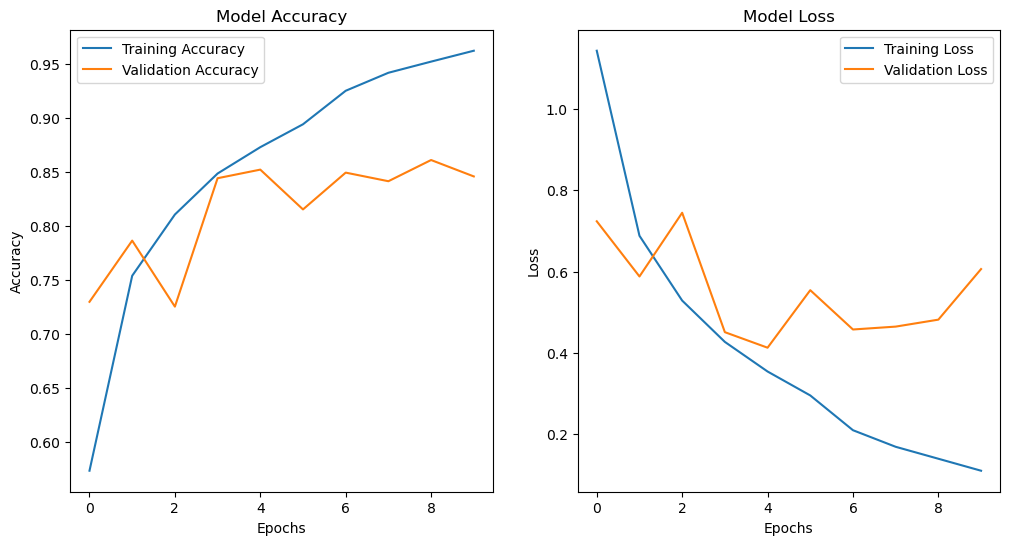

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step
Confusion Matrix:
 [[459   1  12  25   0  31  33   0  33   6]
 [  0 581   0   3   0  11   0   0   0   5]
 [  2  15 443  26  15   8  58  20  12   1]
 [  3   0   6 409  18   6  18  15  25   0]
 [  0   0   1  31 414   0   1  51   2   0]
 [  0  21   8   6   0 352   3   0  10   0]
 [  8   2  37  68   5  14 341  18   7   0]
 [  0   0   1   7   4   0   0 587   1   0]
 [ 11   9   6  57   1  13   3   1 396   3]
 [  2   2   0   1   0   2   0   0   6 587]]


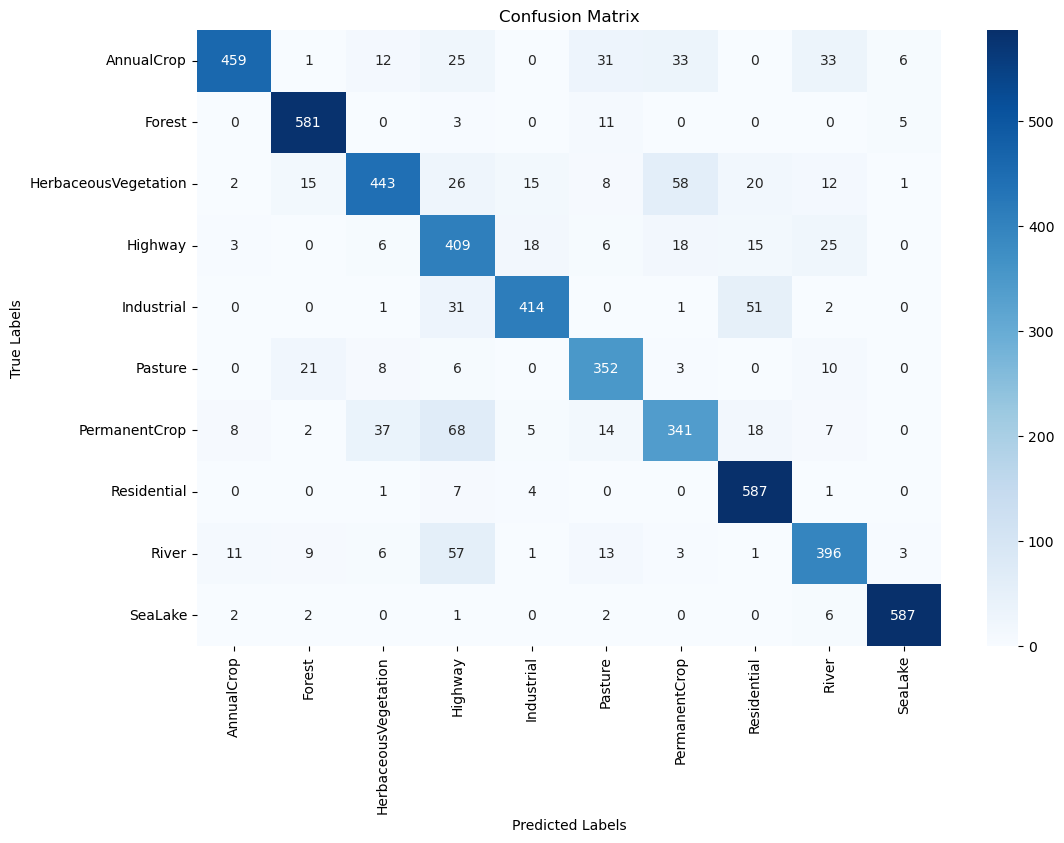

                      precision    recall  f1-score   support

          AnnualCrop       0.95      0.77      0.85       600
              Forest       0.92      0.97      0.94       600
HerbaceousVegetation       0.86      0.74      0.80       600
             Highway       0.65      0.82      0.72       500
          Industrial       0.91      0.83      0.87       500
             Pasture       0.81      0.88      0.84       400
       PermanentCrop       0.75      0.68      0.71       500
         Residential       0.85      0.98      0.91       600
               River       0.80      0.79      0.80       500
             SeaLake       0.98      0.98      0.98       600

            accuracy                           0.85      5400
           macro avg       0.85      0.84      0.84      5400
        weighted avg       0.85      0.85      0.85      5400



In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes, target_names=categories))

In [33]:
model.save('satellite_image_classification_model.keras')

In [35]:
from tensorflow.keras.models import load_model

loaded_model = load_model('satellite_image_classification_model.keras')

Number of bands in the image: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
Predicted Class: HerbaceousVegetation


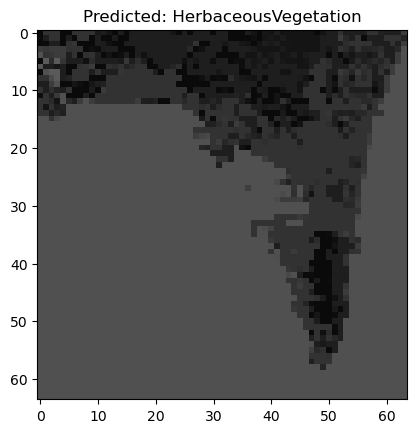

In [41]:
import rasterio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the GeoTIFF image (assuming the file might have only one band)
def load_geotiff_image(image_path, target_size=(64, 64)):
    with rasterio.open(image_path) as src:
        # Check the number of bands in the image
        num_bands = src.count
        print(f"Number of bands in the image: {num_bands}")
        
        # Read the available bands (if it's a single-band image, read only band 1)
        if num_bands == 1:
            img_data = src.read(1)  # Read the single band (grayscale)
            img_data = np.stack([img_data] * 3, axis=-1)  # Replicate to create a pseudo-RGB image
        else:
            img_data = src.read([1, 2, 3])  # For RGB bands (Red, Green, Blue)
            img_data = np.moveaxis(img_data, 0, -1)  # Move bands to last dimension (height, width, channels)
        
        # Resize the image to the target size (e.g., 64x64)
        img_data_resized = tf.image.resize(img_data, target_size).numpy()
        
        # Normalize the pixel values to [0, 1]
        img_data_resized = img_data_resized / 255.0
        return img_data_resized

# Path to the new .tif image file
new_image_path = r'C:\Users\vides\Desktop\Land-Cover-Prediction-Using-Machine-Learning-main\Data\Raster\S2A_MSIL1C_20220516_Train_GT.tif'

# Load and preprocess the image
image = load_geotiff_image(new_image_path)

# Add batch dimension (as the model expects batches)
image = np.expand_dims(image, axis=0)

# Load the trained model (assuming it's already saved)
model = tf.keras.models.load_model('satellite_image_classification_model.keras')

# Predict the class of the new image
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)

# Print the predicted class
categories = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
print(f"Predicted Class: {categories[predicted_class[0]]}")

# Display the image for visual reference
plt.imshow(image[0])
plt.title(f"Predicted: {categories[predicted_class[0]]}")
plt.show()

Number of bands in the image: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
Predicted Class: Industrial


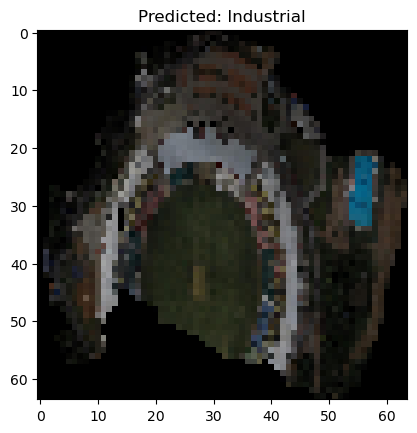

In [45]:
import rasterio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the GeoTIFF image (assuming the file might have only one band)
def load_geotiff_image(image_path, target_size=(64, 64)):
    with rasterio.open(image_path) as src:
        # Check the number of bands in the image
        num_bands = src.count
        print(f"Number of bands in the image: {num_bands}")
        
        # Read the available bands (if it's a single-band image, read only band 1)
        if num_bands == 1:
            img_data = src.read(1)  # Read the single band (grayscale)
            img_data = np.stack([img_data] * 3, axis=-1)  # Replicate to create a pseudo-RGB image
        else:
            img_data = src.read([1, 2, 3])  # For RGB bands (Red, Green, Blue)
            img_data = np.moveaxis(img_data, 0, -1)  # Move bands to last dimension (height, width, channels)
        
        # Resize the image to the target size (e.g., 64x64)
        img_data_resized = tf.image.resize(img_data, target_size).numpy()
        
        # Normalize the pixel values to [0, 1]
        img_data_resized = img_data_resized / 255.0
        return img_data_resized

# Path to the new .tif image file
new_image_path = '6215f2918fbbdc0006332881.tif'

# Load and preprocess the image
image = load_geotiff_image(new_image_path)

# Add batch dimension (as the model expects batches)
image = np.expand_dims(image, axis=0)

# Load the trained model (assuming it's already saved)
model = tf.keras.models.load_model('satellite_image_classification_model.keras')

# Predict the class of the new image
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)

# Print the predicted class
categories = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
print(f"Predicted Class: {categories[predicted_class[0]]}")

# Display the image for visual reference
plt.imshow(image[0])
plt.title(f"Predicted: {categories[predicted_class[0]]}")
plt.show()

Number of bands in the image: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Class: HerbaceousVegetation


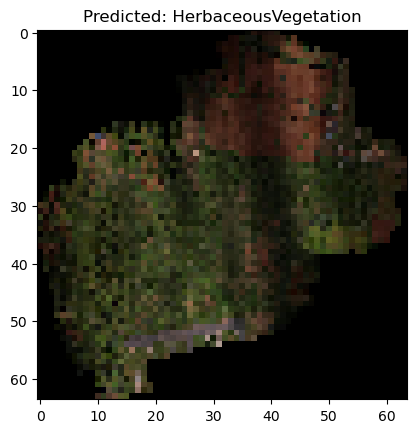

In [47]:
import rasterio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the GeoTIFF image (assuming the file might have only one band)
def load_geotiff_image(image_path, target_size=(64, 64)):
    with rasterio.open(image_path) as src:
        # Check the number of bands in the image
        num_bands = src.count
        print(f"Number of bands in the image: {num_bands}")
        
        # Read the available bands (if it's a single-band image, read only band 1)
        if num_bands == 1:
            img_data = src.read(1)  # Read the single band (grayscale)
            img_data = np.stack([img_data] * 3, axis=-1)  # Replicate to create a pseudo-RGB image
        else:
            img_data = src.read([1, 2, 3])  # For RGB bands (Red, Green, Blue)
            img_data = np.moveaxis(img_data, 0, -1)  # Move bands to last dimension (height, width, channels)
        
        # Resize the image to the target size (e.g., 64x64)
        img_data_resized = tf.image.resize(img_data, target_size).numpy()
        
        # Normalize the pixel values to [0, 1]
        img_data_resized = img_data_resized / 255.0
        return img_data_resized

# Path to the new .tif image file
new_image_path = '62f3291df526a800059dc271.tif'

# Load and preprocess the image
image = load_geotiff_image(new_image_path)

# Add batch dimension (as the model expects batches)
image = np.expand_dims(image, axis=0)

# Load the trained model (assuming it's already saved)
model = tf.keras.models.load_model('satellite_image_classification_model.keras')

# Predict the class of the new image
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)

# Print the predicted class
categories = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
print(f"Predicted Class: {categories[predicted_class[0]]}")

# Display the image for visual reference
plt.imshow(image[0])
plt.title(f"Predicted: {categories[predicted_class[0]]}")
plt.show()

Number of bands in the image: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
Predicted Class: Residential


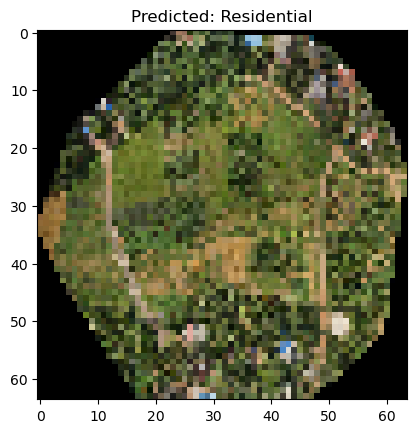

In [49]:
import rasterio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the GeoTIFF image (assuming the file might have only one band)
def load_geotiff_image(image_path, target_size=(64, 64)):
    with rasterio.open(image_path) as src:
        # Check the number of bands in the image
        num_bands = src.count
        print(f"Number of bands in the image: {num_bands}")
        
        # Read the available bands (if it's a single-band image, read only band 1)
        if num_bands == 1:
            img_data = src.read(1)  # Read the single band (grayscale)
            img_data = np.stack([img_data] * 3, axis=-1)  # Replicate to create a pseudo-RGB image
        else:
            img_data = src.read([1, 2, 3])  # For RGB bands (Red, Green, Blue)
            img_data = np.moveaxis(img_data, 0, -1)  # Move bands to last dimension (height, width, channels)
        
        # Resize the image to the target size (e.g., 64x64)
        img_data_resized = tf.image.resize(img_data, target_size).numpy()
        
        # Normalize the pixel values to [0, 1]
        img_data_resized = img_data_resized / 255.0
        return img_data_resized

# Path to the new .tif image file
new_image_path = '6561c0363aa0a70001316b17.tif'

# Load and preprocess the image
image = load_geotiff_image(new_image_path)

# Add batch dimension (as the model expects batches)
image = np.expand_dims(image, axis=0)

# Load the trained model (assuming it's already saved)
model = tf.keras.models.load_model('satellite_image_classification_model.keras')

# Predict the class of the new image
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)

# Print the predicted class
categories = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
print(f"Predicted Class: {categories[predicted_class[0]]}")

# Display the image for visual reference
plt.imshow(image[0])
plt.title(f"Predicted: {categories[predicted_class[0]]}")
plt.show()

In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [1]:
jupyter nbextension enable --py widgetsnbextension
jupyter nbextension install --py widgetsnbextension

SyntaxError: invalid syntax (977926217.py, line 1)

In [1]:
import os
import numpy as np
import tensorflow as tf
import rasterio
from rasterio.plot import reshape_as_image
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the trained model
MODEL_PATH = "satellite_image_classification_model.keras"
model = tf.keras.models.load_model(MODEL_PATH)

# Define categories
CATEGORIES = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
              'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

# Function to preprocess the .tif file
def preprocess_tif(file_path):
    with rasterio.open(file_path) as src:
        img_data = src.read([1, 2, 3])  # Read RGB bands
        img_data = np.moveaxis(img_data, 0, -1)  # Move bands to last axis
        img_resized = np.array(Image.fromarray(img_data).resize((64, 64)))  # Resize to model input size
        return img_resized / 255.0  # Normalize image

# File upload widget
file_upload = widgets.FileUpload(accept=".tif", multiple=False)
output = widgets.Output()

# Function to handle file upload and prediction
def on_file_upload(change):
    output.clear_output()  # Clear previous output
    for name, file_info in file_upload.value.items():
        file_path = os.path.join(name)
        with open(file_path, "wb") as f:
            f.write(file_info["content"])
        
        try:
            # Preprocess the file
            image = preprocess_tif(file_path)
            
            # Display the preprocessed image
            with output:
                display(Image.fromarray((image * 255).astype(np.uint8), "RGB"))

            # Predict the category
            image = np.expand_dims(image, axis=0)  # Add batch dimension
            prediction = model.predict(image)
            predicted_class = CATEGORIES[np.argmax(prediction)]
            
            # Display the result
            with output:
                print(f"Predicted Land Use Category: {predicted_class}")
        except Exception as e:
            with output:
                print(f"Error processing file: {e}")

# Attach the handler to file upload
file_upload.observe(on_file_upload, names="value")

# Display widgets
display(file_upload, output)

FileUpload(value={}, accept='.tif', description='Upload')

Output()

In [3]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(value=50, min=0, max=100, step=1, description="Test Slider")
display(slider)

IntSlider(value=50, description='Test Slider')